In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import PolynomialFeatures
import importlib

#from modelos import Dataframe, OLS
import modelos
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

import seaborn as sns

from scipy.optimize import fmin 
#from autograd import grad


from sklearn.datasets import load_breast_cancer

Load the model

In [2]:
cancer = load_breast_cancer()

\begin{itemize}
    \item Part a$)$ to e$)$ included, OLS, Ridge and Lasso: \textit{project1_part1.ipynb}
    \item Part f$)$, GD methods: \textit{project1_part2.ipynb}
    \item Part g$)$, Logistic Regression: \textit{project1_part3.ipynb}
\end{itemize}

### Morten Code

In [4]:
from sklearn.model_selection import  train_test_split 
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,random_state=0)
print(X_train.shape)
print(X_test.shape)
# Logistic Regression
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)
print("Test set accuracy with Logistic Regression: {:.2f}".format(logreg.score(X_test,y_test)))
#now scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Logistic Regression
logreg.fit(X_train_scaled, y_train)
print("Test set accuracy Logistic Regression with scaled data: {:.2f}".format(logreg.score(X_test_scaled,y_test)))

(426, 30)
(143, 30)
Test set accuracy with Logistic Regression: 0.94
Test set accuracy Logistic Regression with scaled data: 0.96


/Users/ijpoquet/.conda/envs/CompSci_project1/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [3]:
import pandas as pd
cancerpd = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [4]:
cancerpd

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Preparing the data

In [40]:
data = cancer.data
y = cancer.target

#Split into train and test
x_train, x_test, y_train, y_test = train_test_split(data, y, train_size=0.7)

#Creation of feature matrixs
feat_train = np.concatenate(( np.ones((x_train.shape[0],1)), x_train), axis=1)
feat_test = np.concatenate(( np.ones((x_test.shape[0],1)), x_test), axis=1)

#Scaling of the data
scaler = StandardScaler()
feat_train = scaler.fit_transform(feat_train)
scaler = StandardScaler()
feat_test = scaler.fit_transform(feat_test)

Loading of the model.

In [39]:
model2 = modelos.LogisticRegr(method='GD_MB')
model2.fit(feature_matrix=feat_train, gamma=0.1, y=y_train, n_epochs=10000,mode='ADAM',mb=2)

NaN value in epoch 1


/Users/ijpoquet/PhD/PhD/CompSci_Course/modelos.py:724: RuntimeWarning: invalid value encountered in true_divide
  return gamma0*(delta + self.__getir/np.sqrt(self.__getir2))


Creation of the model and training

In [65]:
model = modelos.LogisticRegr()
lr = 0.09 
momentum=0
model.fit(feature_matrix=feat_train, gamma=lr,y=y_train, sigma=momentum,max_iters=100, epsilon=0.01)

Time 0.008648872375488281 seconds
Max number of iterations achieved: 100 with grad. [ 0.         -1.07029305 -0.27166403 -1.05084255 -0.9070109   0.28161186
 -0.31419302  0.27884117 -0.00912788 -0.01809056  0.6296607   0.0848782
  0.48957645 -0.38337081  0.04280792 -0.13422282 -1.07247391  0.26266538
 -0.17270136 -0.12046084 -0.5329783  -0.29030271  0.12405195 -0.53802703
 -0.19837935 -0.65628275 -0.8824238   0.20753158 -0.27121457 -0.69285415
 -0.04298061]


Predictions of the model

In [66]:
pred = model.predict(feat_test)
ypred = np.zeros_like(pred)
for i in range(pred.shape[0]):
    if pred[i] > 0.5:
        ypred[i] = 1
    else:
        ypred[i] = 0

score = 0
for i in range(len(ypred)):
    if ypred[i] == y[i]:
        score += 1

tn,fp,fn,tp = metrics.confusion_matrix(y_test, ypred).ravel() #tn, fp, fn, tp 
F1 = tp/(tp+0.5*(fp+fn))
recall = tp/(tp+fn)
precision = tp/(tp+fp)
accuracy=(tp+tn)/(tp+fn+tn+fp)

print("Accuracy = {:.3f}".format(accuracy))
print("F1 = {:.3f}".format(F1))

Accuracy = 0.965
F1 = 0.971


In [220]:
lr2 = np.arange(4.e-3, 1.e-2,1.e-3)
lr3 = np.arange(1.e-2, 1.e-1,1.e-2)
lr4 = np.arange(1.e-3, 2.e-3,1.e-3) 
l_rates = np.concatenate((lr2, lr3))
l_rates = lr2
m1 = np.array([0])
m2 = np.arange(0.01, 0.1, 0.01)
m3 = np.arange(0.1, 1, 0.1)
lr4 = np.arange(1.e-3, 2.e-3,1.e-3) 
momentum = np.concatenate((m1,m2, m3))

Computations and predictions for different momentums and learning rates.

In [236]:
mom = np.arange(0,1,0.1) #momentums
vec = np.array([0.001,0.005,0.01,0.05, 0.1]) #learning rates
#mom = momentum
#vec = l_rates

pred = np.zeros((feat_test.shape[0],vec.shape[0], mom.shape[0]))
ypred = np.zeros_like(pred)
for j, val in enumerate(mom):
    for i,lr in enumerate(vec):
        model = modelos.LogisticRegr()
        model.fit(feature_matrix=feat_train, gamma=lr,y=y_train, sigma=val,max_iters=100, epsilon=0.01)
        pred[:,i,j] = model.predict(feat_test)

for i in range(pred.shape[0]):
    for j in range(pred.shape[1]):
        for k in range(pred.shape[2]):
            if pred[i,j,k] > 0.5:
                ypred[i,j,k] = 1
            else:
                ypred[i,j,k] = 0


metricas = np.zeros((4,vec.shape[0], mom.shape[0]))
for i in range(pred.shape[1]):
    for j in range(pred.shape[2]):
        metricas[:,i,j] = metrics.confusion_matrix(y_test, ypred[:,i,j]).ravel()#tn,fp,fn,tp

tp = metricas[-1,...]
tn = metricas[0,...]
fp = metricas[1,...]
fn = metricas[2,...]
F1 = tp/(tp+0.5*(fp+fn))
recall = tp/(tp+fn)
precision = tp/(tp+fp)
accuracy=(tp+tn)/(tp+fn+tn+fp)


Time 0.008189916610717773 seconds
Max number of iterations achieved: 100 with grad. [ 0.          0.60022313  1.26502607  0.62802825  1.25928717 -0.01669047
 -0.51370286  1.92867906  1.53478569  1.16982143 -0.29695129  2.40017809
 -0.98312427  1.7562618   2.60866533  0.22299038 -2.01009883 -0.22702992
 -0.91581383  0.36821908 -0.89816476  2.19980472  2.48021888  1.88215671
  2.83582207  1.22903675 -0.53783215  1.19961034  1.3414507   1.70978533
  0.72301259]
Time 0.006700992584228516 seconds
Max number of iterations achieved: 100 with grad. [ 0.         -0.68471916 -0.08545073 -0.66029292 -0.33627103 -0.2829037
 -0.61945437  0.66631203  0.11059574  0.35402078  0.12857053  0.57084682
 -0.71945322  0.19594915  0.71298827 -0.05166076 -1.08577678  0.3612413
 -0.33022229 -0.12018052 -0.23686809  0.29186948  0.74199784  0.10781998
  0.64712978  0.03448784 -0.64540154  0.62324807  0.26580153 -0.00491113
  0.46105418]
Time 0.006530046463012695 seconds
Max number of iterations achieved: 100 wit

<ipython-input-236-a07cbe48f403>:34: RuntimeWarning: invalid value encountered in true_divide
  precision = tp/(tp+fp)


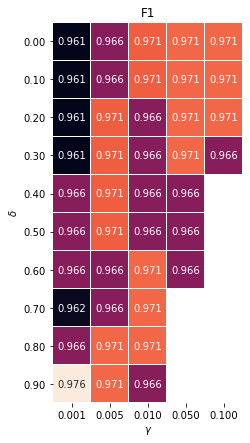

In [272]:
from matplotlib.colors import LogNorm, Normalize
ticks = ["{:.3f}".format(i) for i in vec]
legends = ["{:.2f}".format(i) for i in mom]
g=1
fig, ax = plt.subplots(1,1 ,figsize=(g*10,g*7))

ax = sns.heatmap(F1[:,:].T, norm=LogNorm(), annot=True, fmt=".3f", linewidths=.3, square=True, cbar_kws={'label':'F1'}, cbar=False)
ax.set_xticklabels(ticks, rotation="0")
ax.set_yticklabels(legends, rotation="horizontal")
ax.set_xlabel("$\gamma$")
ax.set_ylabel("$\delta$")
ax.set_title('F1')
plt.savefig('/Users/ijpoquet/PhD/PhD/CompSci_Course/plots/F1logistic', dpi=300)

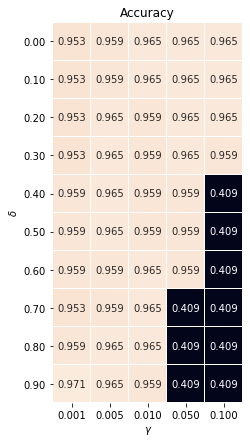

In [273]:
g=1
fig, ax = plt.subplots(1 ,figsize=(g*10,g*7))


ax = sns.heatmap(accuracy[:,:].T, norm=LogNorm(), annot=True, fmt=".3f", linewidths=.3, square=True, cbar=False)
ax.set_xticklabels(ticks, rotation="0")
ax.set_yticklabels(legends, rotation="horizontal")
ax.set_xlabel("$\gamma$")
ax.set_ylabel("$\delta$")
ax.set_title('Accuracy')
plt.savefig('/Users/ijpoquet/PhD/PhD/CompSci_Course/plots/Accuracylogistic', dpi=300)

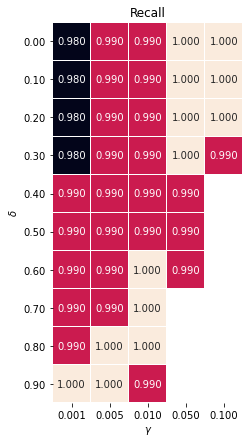

In [274]:
g=1
fig, ax = plt.subplots(1 ,figsize=(g*10,g*7))


ax = sns.heatmap(recall[:,:].T, norm=LogNorm(), annot=True, fmt=".3f", linewidths=.3, square=True, cbar=False)
ax.set_xticklabels(ticks, rotation="0")
ax.set_yticklabels(legends, rotation="horizontal")
ax.set_xlabel("$\gamma$")
ax.set_ylabel("$\delta$")
ax.set_title('Recall')
plt.savefig('/Users/ijpoquet/PhD/PhD/CompSci_Course/plots/Recalllogistic', dpi=300)

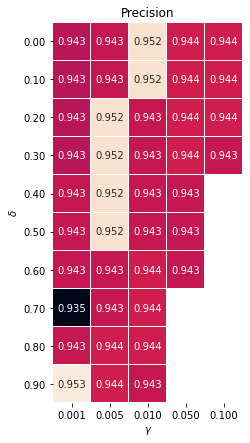

In [275]:
g=1
fig, ax = plt.subplots(1 ,figsize=(g*10,g*7))


ax = sns.heatmap(precision[:,:].T, norm=LogNorm(), annot=True, fmt=".3f", linewidths=.3, square=True, cbar=False)
ax.set_xticklabels(ticks, rotation="0")
ax.set_yticklabels(legends, rotation="horizontal")
ax.set_xlabel("$\gamma$")
ax.set_ylabel("$\delta$")
ax.set_title('Precision')
plt.savefig('/Users/ijpoquet/PhD/PhD/CompSci_Course/plots/Precisionlogistic', dpi=300)